## Example 9.2: Apply the Numerov algorithm to solve Poisson's equation with $\rho(r) = \frac{1}{8 \pi} e^{-r}$. 

Assume the exact solution $\phi(r) = 1 - \frac{1}{2} (r+2) e^{-r}$ and plot the error up to $r=20$. 

To start up the recursion, use the information from the exact solution: $\phi_1 = \phi(r=h) = 1 - \frac{1}{2} (h + 2) e^{-h}$. 

Solution: 

Let's adapt the Numerov algorithm from Example 9.1 to solve this problem. We now have $\phi_1$ available through the exact solution. 

In [10]:
import numpy as np

# Numerov's algorithm (forward)
# takes as input the initial conditions y(0) and y(h) as y0 and y1, respectively
# h is the step size, the k-squared term (k2), the S term -- these are FUNCTIONS!
# the initial value of the independent variable x0, and the final value xf
# returns t,y as the solution arrays
def Numerov2(k2, S, y0, y1, h, x0, xf):
    """Returns the solution to a 2nd-order ODEs of the type: y'' + k^2 y = S(x) via the Numerov algorithm"""
    # the number of steps:
    N = int( (xf-x0)/h ) # needs to be an integer
    # define the numpy arrays to return
    ya = np.zeros(N+1)
    xa = np.zeros(N+1)
    # set the first two values of the arrays:
    ya[0] = y0
    ya[1] = y1
    xa[0] = x0
    xa[1] = x0 + h
    # integrate via the Numerov algo:
    for n in range(1,N):
        x = x0 + n*h
        xa[n]=x
        h2dt = h**2/12 # appears often so let's just calculate it once!
        ya[n+1] = (2 * (1 - 5*h2dt * k2(x)) * ya[n] - (1 + h2dt *k2(x-h)) * ya[n-1] + h2dt*(S(x+h) + 10 * S(x) + S(x-h)))/((1 + h2dt * k2(x+h) ))    
    xa[N] = xf # set the last x value which is not set in the loop
    return xa,ya

# Implement the functions specific to our equation: 
def k2func(x):
    """The k-squared function corresponding to the differential equation"""
    return 0.

def Sfunc(x):
    """The source term S(x) corresponding to the differential equation"""
    return - 0.5 * x * np.exp(-x)

# the exact solution:

def yexact(x):
    """The exact solution to the Poisson equation for Example 9.2"""
    return 1 - 0.5 * (x + 2) * np.exp(-x)

# SOLVE the equation:
# the step size
h = 1E-1
# final point:
xf = 20
# Set the initial conditions 
x0 = 0
y0 = 0
y1 = yexact(h)

# Call the function:
xsol, ysol = Numerov2(k2func, Sfunc, y0, y1, h, x0, xf)

Now let's plot the error: $\phi(r) - \phi_\mathrm{exact}(r)$.

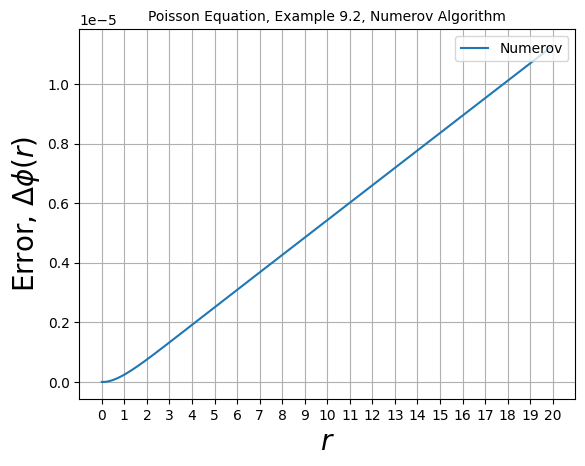

In [11]:
# Let's plot:
import matplotlib.pyplot as plt # import matplotlib, a conventional module name is plt
import numpy as np
from math import pi
fig, ax = plt.subplots() # create the elements required for matplotlib. This creates a figure containing a single axes.

# set the labels and titles:
ax.set_xlabel(r'$r$', fontsize=20) # set the x label
ax.set_ylabel(r'Error, $\Delta \phi(r)$', fontsize=20) # set the y label. Note that the 'r' is necessary to remove the need for double slashes. You can use LaTeX! 
ax.set_title('Poisson Equation, Example 9.2, Numerov Algorithm', fontsize=10) # set the title 

# make a one-dimensional plot using the above arrays, add a custom label
ax.plot(xsol, ysol-yexact(xsol), label='Numerov') 

# set the ticks
ax.set_xticks(range(21))
ax.grid()

# construct the legend:
ax.legend(loc='upper right')  # Add a legend

plt.show() # show the plot here

Something is wrong! The error is getting larger at large $r$! 